In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [4]:
clock_bkg = pd.read_csv("Data/Other/Clock_Background.csv", skiprows=21, engine="python") # names=init_run_cols,

clock_bkg["Norm_Counts"] = clock_bkg["Counts"].copy() / 91645.6
clock_bkg["Norm_Error"] = (clock_bkg["Counts"].copy())**0.5 / (91645.6)

clock_bkg

,Channel,Energy,Counts,Norm_Counts,Norm_Error
0,0,NaN,46,0.000502,0.000074
1,1,NaN,2,0.000022,0.000015
2,2,NaN,4,0.000044,0.000022
3,3,NaN,4,0.000044,0.000022
4,4,NaN,5,0.000055,0.000024
...,...,...,...,...,...
4091,4091,NaN,42,0.000458,0.000071
4092,4092,NaN,63,0.000687,0.000087
4093,4093,NaN,49,0.000535,0.000076
4094,4094,NaN,66,0.000720,0.000089


In [5]:
clock_data = pd.read_csv("Data/Other/Clock_LongRun.csv", skiprows=21, engine="python") # names=init_run_cols,

clock_data["Norm_Counts"] = clock_data["Counts"].copy() / 156529.47
clock_data["Norm_Error"] = (clock_data["Counts"].copy())**0.5 / (156529.47)

clock_data

,Channel,Energy,Counts,Norm_Counts,Norm_Error
0,0,NaN,880,0.005622,0.000190
1,1,NaN,83,0.000530,0.000058
2,2,NaN,78,0.000498,0.000056
3,3,NaN,113,0.000722,0.000068
4,4,NaN,115,0.000735,0.000069
...,...,...,...,...,...
4091,4091,NaN,822,0.005251,0.000183
4092,4092,NaN,802,0.005124,0.000181
4093,4093,NaN,845,0.005398,0.000186
4094,4094,NaN,865,0.005526,0.000188


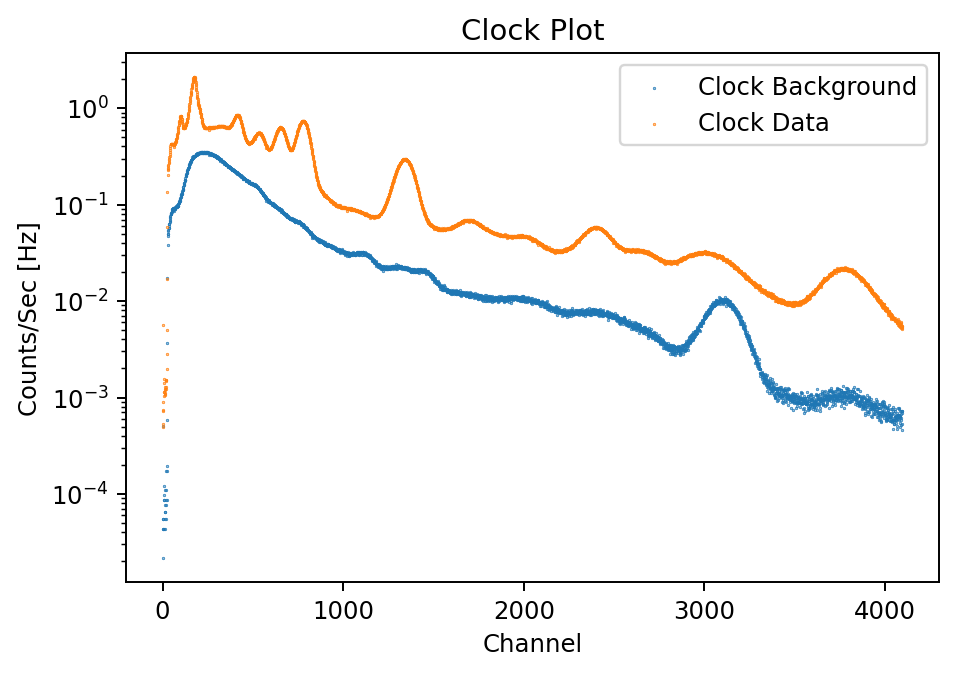

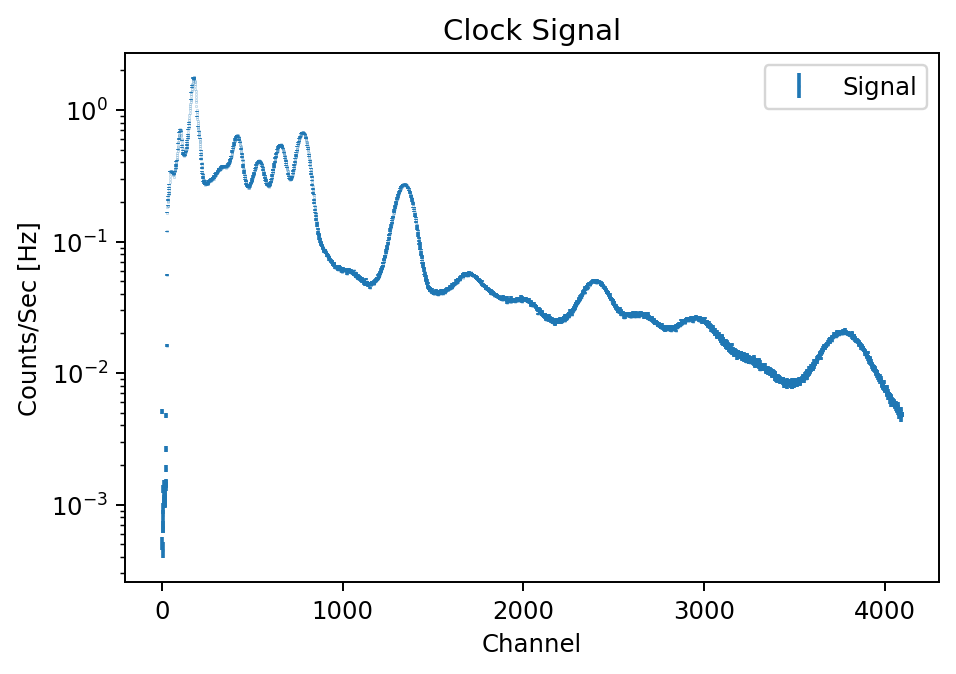

In [10]:
plt.figure(dpi=175)
plt.title("Clock Plot")
plt.xlabel("Channel")
plt.ylabel("Counts/Sec [Hz]")

plt.scatter(clock_bkg["Channel"], clock_bkg["Norm_Counts"], s=.1, alpha=1, label="Clock Background")
plt.scatter(clock_data["Channel"], clock_data["Norm_Counts"], s=.1, alpha=1, label="Clock Data")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

plt.savefig("Plots/Clock_DataBackground.pdf")
plt.show()

plt.figure(dpi=175)
plt.title("Clock Signal")
plt.xlabel("Channel")
plt.ylabel("Counts/Sec [Hz]")

plt.errorbar(clock_data["Channel"], clock_data["Norm_Counts"]-clock_bkg["Norm_Counts"],
             yerr=np.sqrt(clock_bkg["Norm_Error"]**2+clock_data["Norm_Error"]**2), 
             fmt="o", ms=.1, alpha=1, label="Signal")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

plt.savefig("Plots/Clock_Signal.pdf")
plt.show()